<a href="https://colab.research.google.com/github/Leorizky19/AI/blob/main/Tugas_Akhir_Sistem_Pakar_Pariwisata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

In [ ]:
budget = ctrl.Antecedent(np.arange(0, 15, 1),'budget')
jarak = ctrl.Antecedent(np.arange(0, 3100, 1),'jarak')
durasi = ctrl.Antecedent(np.arange(0, 7, 1),'durasi')


In [ ]:
budget['kecil'] = fuzz.trapmf(budget.universe,[0, 0, 2, 5])
budget['sedang'] = fuzz.trimf(budget.universe,[4, 7, 10])
budget['besar'] = fuzz.trapmf(budget.universe,[9, 12, 15, 15])

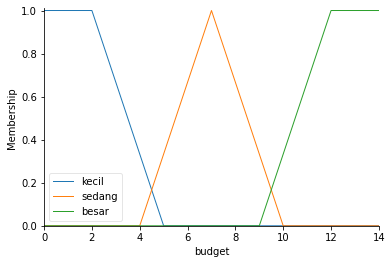

In [ ]:
budget.view()

In [ ]:
jarak['dekat'] = fuzz.trapmf(jarak.universe, [0, 0, 1100, 2200])
jarak['jauh'] = fuzz.trapmf(jarak.universe, [2000, 2550, 3100, 3100])

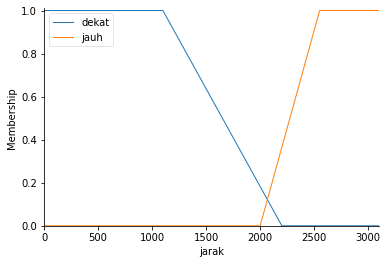

In [ ]:
jarak.view()

In [ ]:
durasi['sebentar'] = fuzz.trapmf(durasi.universe, [0, 0, 2, 4])
durasi['lama'] = fuzz.trapmf(durasi.universe, [3, 5, 7, 7])

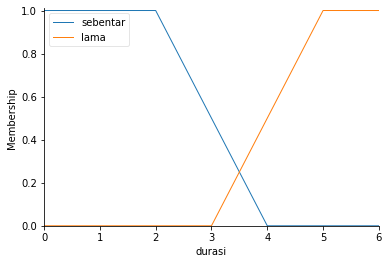

In [ ]:
durasi.view()

In [ ]:
kondisi = ctrl.Consequent(np.arange(0, 126, 1),'kondisi')

In [ ]:
kondisi['tidak memungkinkan'] = fuzz.trimf(kondisi.universe,[0, 0, 50])
kondisi['kurang memungkinkan'] = fuzz.trimf(kondisi.universe,[25, 50, 125])
kondisi['memungkinkan'] = fuzz.trimf(kondisi.universe,[50, 125, 125])

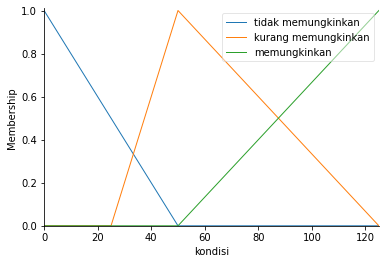

In [ ]:
kondisi.view()

In [ ]:
rule1 = ctrl.Rule(budget['kecil'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule2 = ctrl.Rule(budget['kecil'] & jarak['dekat'] & durasi['lama'], kondisi['kurang memungkinkan'])
rule3 = ctrl.Rule(budget['kecil'] & jarak['jauh'] & durasi['sebentar'], kondisi['tidak memungkinkan'])
rule4 = ctrl.Rule(budget['kecil'] & jarak['jauh'] & durasi['lama'], kondisi['tidak memungkinkan'])
rule5 = ctrl.Rule(budget['sedang'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule6 = ctrl.Rule(budget['sedang'] & jarak['dekat'] & durasi['lama'], kondisi['memungkinkan'])
rule7 = ctrl.Rule(budget['sedang'] & jarak['jauh'] & durasi['sebentar'], kondisi['kurang memungkinkan'])
rule8 = ctrl.Rule(budget['sedang'] & jarak['jauh'] & durasi['lama'], kondisi['tidak memungkinkan'])
rule9 = ctrl.Rule(budget['besar'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule10 = ctrl.Rule(budget['besar'] & jarak['dekat'] & durasi['lama'], kondisi['memungkinkan'])
rule11 = ctrl.Rule(budget['besar'] & jarak['jauh'] & durasi['sebentar'], kondisi['memungkinkan'])
rule12 = ctrl.Rule(budget['besar'] & jarak['jauh'] & durasi['lama'], kondisi['memungkinkan'])

In [ ]:
kondisi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

97.57575757575755


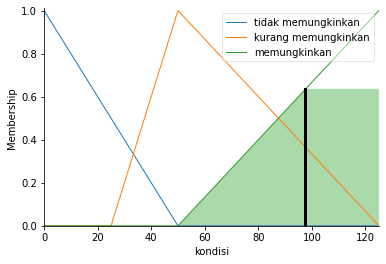

In [ ]:
braking = ctrl.ControlSystemSimulation(kondisi_ctrl)

braking.input['budget'] = 6
braking.input['jarak'] = 1500
braking.input['durasi'] = 5
braking.compute()

print(braking.output['kondisi'])

kondisi.view(sim=braking)